# Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction <a id='intro'></a>
In this project, I will analyze <a href='https://www.kaggle.com/joniarroba/noshowappointments' target="_blank">Medical Appointment No Shows Dataset</a> and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Data Dictionary
110,527 medical appointments, 14 associated variables (characteristics). <br>
The most important one if the patient show-up or no-show for the appointment. <br><br>
*PatientId:* Identification of a patient.

*AppointmentID:* Identification of each appointment.

*Gender:* Male (M) or Female (F).

*ScheduledDay:* The day someone called or registered the appointment, this is before appointment of course.

*AppointmentDay:* The day of the actuall appointment, when they have to visit the doctor.

*Age:* How old is the patient. 

*Neighbourhood:* Where the appointment takes place.

*Scholarship:* True (1) of False (0). <br> 
Observation, this is a broad topic, consider reading this article <a href='https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia' target="_blank">here</a>.

*Hipertension:* True (1) or False (0).

*Diabetes:* True (1) or False (0).

*Alcoholism:* True (1) or False (0).

*Handcap:* The handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2, 
<a href='https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699' target="_blank">here</a>.

*SMS_received:* 1 or more messages sent to the patient.
 
*No-show:* Yes or No.

### I will answer the following questions:
- Highest five neighbourhoods in terms of the number of no-show appointments?
- Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?
- Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?
- Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?
- Can the day of the week that the appointment on be considered as a factor to predict if a patient will show up for their scheduled appointment?
- Can the waiting period between scheduled day and appointment day be considered as a factor to predict if a patient will show up for their scheduled appointment?
- What are the percentages of missed appointments for each special condition (alcoholism, diabetes ... etc) ?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling <a id='wrangling'></a>

### General Properties

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# the first 5 rows 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that:
- *ScheduledDay* has a time part, while *AppointmentDay* time part is not given (00:00:00).
- column names are a little bit messy.

In [3]:
# number of samples and columns
df.shape

(110527, 14)

110,527 samples (rows) and 14 columns.

In [4]:
# columns data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

*ScheduledDay* and *AppointmentDay* should be datetime not object (string).

In [5]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There aren't any missing values in any column.

In [6]:
# check for duplicated rows
df.duplicated().sum()

0

There aren't any duplicated rows.

In [7]:
# number of non-null unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- 62,299 Patient ids so this means that some patients had more than one appointment, this could lead to a useful analysis which i'm not going to cover in this project.
- Only 27 unique appointment days.
- 81 unique neighbourhoods.

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The average age in this dataset is 37, and the heighest age is 115, while -1 is the minimum age which is an issue that will be fixed later.

In [9]:
df['AppointmentDay'].min(), df['AppointmentDay'].max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

The first appointment in this dataset was on 2016-04-29 and the last appointment was on 2016-06-08, 
so this means these 110,527 appointments were in a period of 40 days only.

### Data Cleaning

#### Drop extraneous columns

In [10]:
df.drop(['PatientId', 'AppointmentID', 'SMS_received'], axis=1, inplace=True)
df.shape

(110527, 11)

#### Rename columns

In [11]:
def mod_string(col):
    """modifies a given string"""
    if 'Day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    col = col.strip().lower().replace('-','_') # for example: No-show -> no_show
    return col
    
df.rename(columns = lambda x: mod_string(x), inplace=True)
list(df.columns)

['gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'no_show']

#### Fix data types

In [12]:
# convert string to datetime and keep only the date
columns = ['scheduled_day', 'appointment_day']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)

print(df.dtypes)
df.head(3)

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
no_show                    object
dtype: object


,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No


Time was removed because the time in *appointment_day* column was not given as mentioned before.

#### handle incorrect data

In [13]:
# find negative values in age
negative_age = df.query('age < 0')
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,No


Negative age is not possible, so apparently this is a human error.

In [14]:
# drop the row with a negative age
df.drop(negative_age.index, inplace=True)
# check again
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show


Row was dropped successfully. 

#### Change columns values

##### no_show column

In [15]:
# check value counts in no_show column
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

We have 2 values (No, Yes) I will change them to (0, 1).

In [16]:
# if the value Yes then change it to 1, otherwise 0
df.no_show = np.where(df.no_show == "Yes", 1, 0)
# confirm
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

##### handcap column

In [17]:
# check value counts in handcap column
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

Most patients weren't handicapped, 2042 with 1 handicap, 183 with 2 handicaps and so on. In my analysis I don't need to know how many handicaps a patient had, I just need to know if he was handicapped or not, so I will change these values to (0,1) only (0 not handicapped, 1 handicapped).

In [18]:
# if the value is greater than 1 change it to 1, otherwise keep it
df['handcap'] = np.where(df['handcap'] > 1, 1, df['handcap'])
# confirm
df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

<hr>

## Exploratory Data Analysis <a id='eda'></a>

##### no_show column

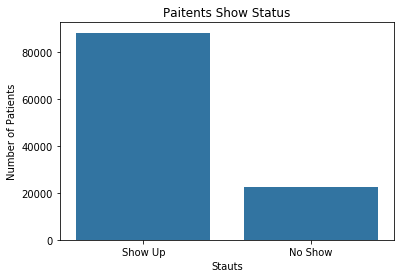

In [19]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'no_show', color = base_color)
plt.title('Paitents Show Status')
plt.xticks([0, 1], ['Show Up', 'No Show'])
plt.xlabel('Stauts')
plt.ylabel('Number of Patients');

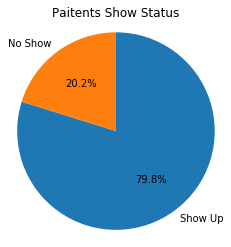

In [20]:
# plot a pie chart
sorted_counts = df.no_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

Most patients showed up for their appointments (79.8%).

##### gender column

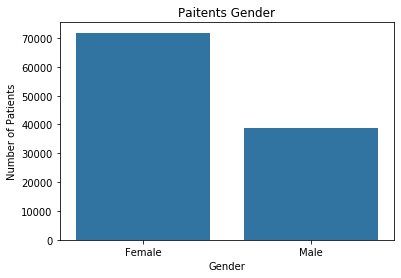

In [21]:
# plot a bar chart
sns.countplot(data = df, x = 'gender', color = base_color)
plt.title('Paitents Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

Most patients were females.

##### age column

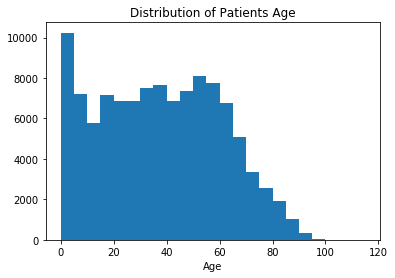

In [22]:
# plot a histogram 
bin_edges = np.arange(0, df['age'].max()+5, 5)
plt.hist(data = df, x = 'age', bins = bin_edges)
plt.xlabel('Age')
plt.title('Distribution of Patients Age');

Most patients were young.

##### scholarship column

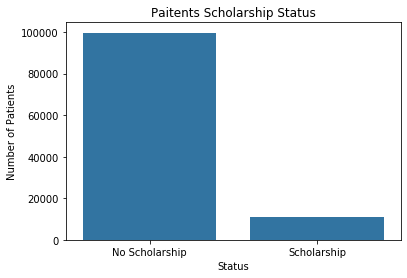

In [23]:
# plot a bar chart
sns.countplot(data = df, x = 'scholarship', color = base_color)
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

Most patients didn't have a scholarship.

##### alcoholism, diabetes, handcap, and hipertension columns

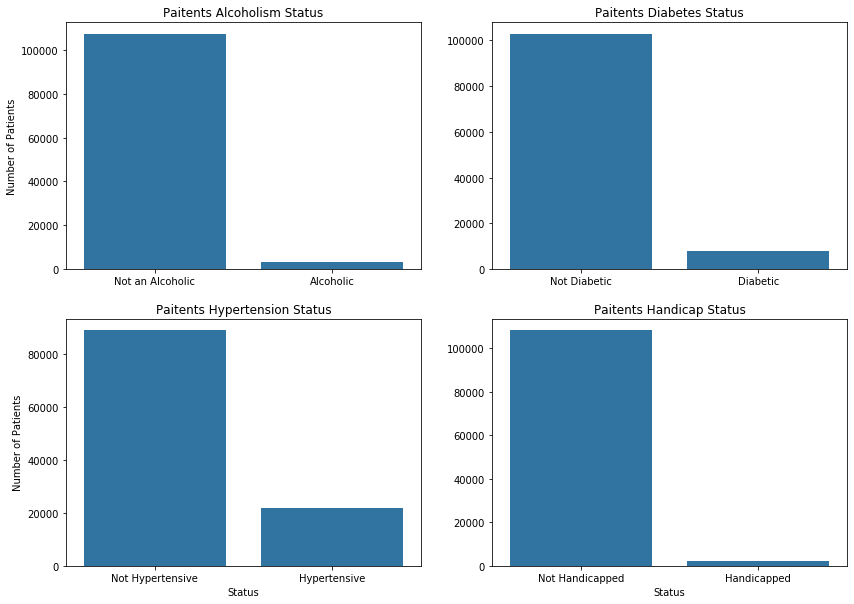

In [24]:
plt.figure(figsize = [14, 10]) # larger figure size for subplots

# alcoholism column
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
sns.countplot(data = df, x = 'alcoholism', color = base_color)
plt.title('Paitents Alcoholism Status')
plt.xticks([0, 1], ['Not an Alcoholic', 'Alcoholic'])
plt.xlabel('')
plt.ylabel('Number of Patients');

# diabetes column
plt.subplot(2, 2, 2) # 2 row, 2 cols, subplot 2
sns.countplot(data = df, x = 'diabetes', color = base_color)
plt.title('Paitents Diabetes Status')
plt.xticks([0, 1], ['Not Diabetic', 'Diabetic'])
plt.xlabel('')
plt.ylabel('');

# hipertension column
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
sns.countplot(data = df, x = 'hipertension', color = base_color)
plt.title('Paitents Hypertension Status')
plt.xticks([0, 1], ['Not Hypertensive', 'Hypertensive'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

# handcap column
plt.subplot(2, 2, 4) # 2 row, 2 cols, subplot 4
sns.countplot(data = df, x = 'handcap', color = base_color)
plt.title('Paitents Handicap Status')
plt.xticks([0, 1], ['Not Handicapped', 'Handicapped'])
plt.xlabel('Status')
plt.ylabel('');

Most patients didn't suffer from alcoholism, diabetes, hypertension, or any handicap.

### New Useful Columns

#### days_between (between scheduled_day and appointment_day)

In [25]:
# calculate days between scheduled_day and appointment_day
days_between = (df['appointment_day'] - df['scheduled_day']).dt.days
# insert a new column (days_between) before column 3
df.insert(3, 'days_between', days_between)
df.head()

,gender,scheduled_day,appointment_day,days_between,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0


In [26]:
# make sure there are no negative values
negative_days = df.query('days_between < 0')
negative_days

,gender,scheduled_day,appointment_day,days_between,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,1
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,1
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,1
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,1
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,1


Since it's not right to have a scheduled_day after appointment_day these rows will be droped.

In [27]:
# drop the rows with negative days
df.drop(negative_days.index, inplace=True)
# check again
df.query('days_between < 0')

,gender,scheduled_day,appointment_day,days_between,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show


Rows were dropped successfully. 

#### waiting period (classify days_between to 4 groups)

In [28]:
# view the min, 25%, 50%, 75%, max days_between values
df['days_between'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_between, dtype: float64

In [29]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 4, 15, 179]
# labels for the four waiting period groups
bin_names = ['0 days','1-4 days','5-15 days','16 days and above']
waiting_period = pd.cut(df['days_between'], bin_edges, labels=bin_names)
# insert a new column (waiting_period) before column 4
df.insert(4, 'waiting_period', waiting_period)
df.head()

,gender,scheduled_day,appointment_day,days_between,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,0,0 days,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29,2016-04-29,0,0 days,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,0 days,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,0 days,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,0 days,56,JARDIM DA PENHA,0,1,1,0,0,0


I won't need *days_between* or *scheduled_day* columns anymore so I will drop them later.

#### week_day (day of the oppointment)

In [30]:
# find which day of the week the appointment was on
week_day = df.appointment_day.dt.weekday 
# insert a new column (week_day) before column 3
df.insert(3, 'week_day', week_day)
df.head()

,gender,scheduled_day,appointment_day,week_day,days_between,waiting_period,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,4,0,0 days,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29,2016-04-29,4,0,0 days,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,4,0,0 days,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,4,0,0 days,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,4,0,0 days,56,JARDIM DA PENHA,0,1,1,0,0,0


I won't need *appointment_day* column anymore so I will drop it later.

#### age_group (classify age to 4 groups)

In [31]:
# view the min, 25%, 50%, 75%, max age values
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [32]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

,gender,scheduled_day,appointment_day,week_day,days_between,waiting_period,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,4,0,0 days,62,56 and above,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29,2016-04-29,4,0,0 days,56,56 and above,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,4,0,0 days,62,56 and above,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,4,0,0 days,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,4,0,0 days,56,56 and above,JARDIM DA PENHA,0,1,1,0,0,0


I won't need *age* column anymore so I will drop it.

#### Drop columns that are no longer needed

In [33]:
df.drop(['scheduled_day', 'appointment_day', 'days_between', 'age'], axis=1, inplace=True)
df.head()

,gender,week_day,waiting_period,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,4,0 days,56 and above,JARDIM DA PENHA,0,1,0,0,0,0
1,M,4,0 days,56 and above,JARDIM DA PENHA,0,0,0,0,0,0
2,F,4,0 days,56 and above,MATA DA PRAIA,0,0,0,0,0,0
3,F,4,0 days,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,4,0 days,56 and above,JARDIM DA PENHA,0,1,1,0,0,0


##### age_group column

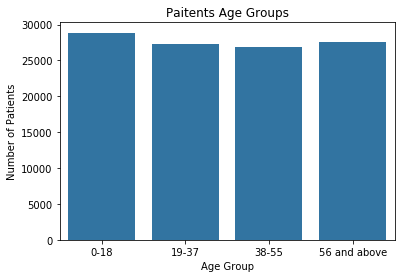

In [34]:
# plot a bar chart
sns.countplot(data = df, x = 'age_group', color = base_color)
plt.title('Paitents Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

Patients age groups were about the same, with the age group (0-18) being slightly higher.

##### waiting_period column

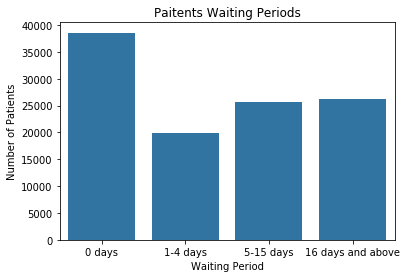

In [35]:
# plot a bar chart
sns.countplot(data = df, x = 'waiting_period', color = base_color)
plt.title('Paitents Waiting Periods')
plt.xlabel('Waiting Period')
plt.ylabel('Number of Patients');

Most patients scheduled their appointments on the same day.

##### week_day column

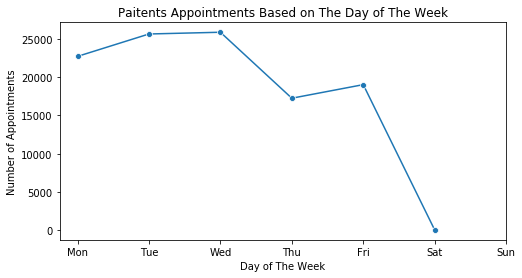

In [36]:
weekday_counts = df.week_day.value_counts()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = weekday_counts.index,  y = weekday_counts, marker='o')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.title('Paitents Appointments Based on The Day of The Week')
plt.xlabel('Day of The Week')
plt.ylabel('Number of Appointments');

Most patients prefered to have their appointments on working days (Monday-Friday) especially Tuesday and Wednesday.

### Q1: Highest five neighbourhoods in terms of the number of no-show appointments?

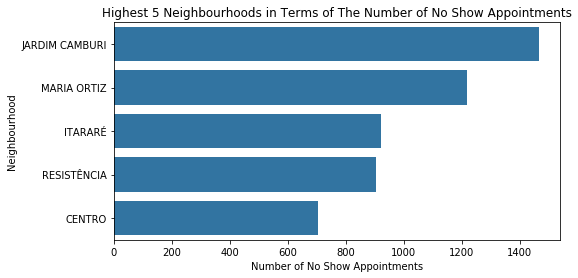

In [37]:
# no show appointments
df_no_show = df[df.no_show == 1]

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
cat_order = df_no_show['neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_no_show, y = 'neighbourhood', color = base_color, order = cat_order)
plt.title('Highest 5 Neighbourhoods in Terms of The Number of No Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood');

As shown in the chart, JARDIM CAMBURI neighbourhood had the heighest number of missed appointments followed by MARIA ORTIZ.

### Q2: Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?

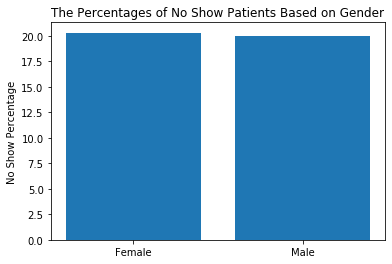

In [38]:
# percentages of no show patients based on gender
no_show_perc_gender = df.groupby('gender').no_show.mean() * 100

# plot a bar chart
plt.bar(x = no_show_perc_gender.index, height = no_show_perc_gender)
plt.title('The Percentages of No Show Patients Based on Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

Based on the chart, the percentages of no show patients based on gender were pretty close. 

So, we can say that the gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.

### Q3: Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?

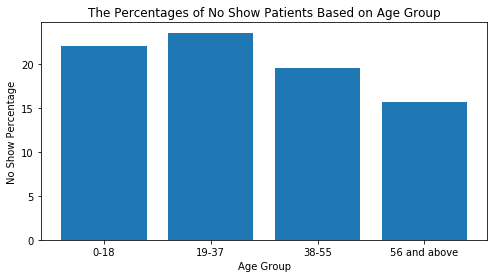

In [39]:
# percentages of no show patients based on age group
no_show_perc_age = df.groupby('age_group').no_show.mean() * 100

# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('The Percentages of No Show Patients Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');

The age group (19-37) missed their appointments more than the other groups. On the other hand, the age group (56 and above) were the most committed to showing up for their appointments. So, we can say that the older the person is the more likely he is going to show up. But we can see that the age group (0-18) didn't follow this rule, and I think that's due to the fact that the child especially in the age of (0-15) is accompanied by an adult. 

So, we can say that the patient's age could help us to predict if a patient will show up for their scheduled appointment.

### Q4: Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?

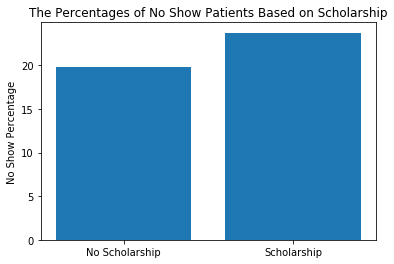

In [40]:
# percentages of no show patients based on scholarship
no_show_perc_scholarship = df.groupby('scholarship').no_show.mean() * 100

# plot a bar chart
plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship)
plt.title('The Percentages of No Show Patients Based on Scholarship')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

From what's shown, about 24% of patients with scholarship didn't show up for their appointments, while about 20% of patients without scholarship missed their appointments. So, it seems like the patient with a scholarship is more likely to miss the appointment.

So, we can say that having a scholarship could help us to predict if a patient will show up for their scheduled appointment.

### Q5: Can the day of the week that the appointment on be considered as a factor to predict if a patient will show up for their scheduled appointment?

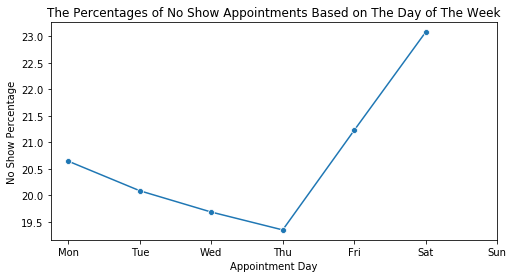

In [41]:
# percentages of no show appointments based on week day
no_show_perc_weekday = df.groupby('week_day').no_show.mean() * 100

# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = no_show_perc_weekday.index,  y = no_show_perc_weekday, marker='o')
plt.title('The Percentages of No Show Appointments Based on The Day of The Week')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('Appointment Day')
plt.ylabel('No Show Percentage');

About 23% of appointments on Saturday were missed, making it the most likely day for patients to not show up. followed by Friday with about 21.2% of the appointments in that day patients didn't show up. On the other hand, Thursday with about 19.4% and Wednesday with about 19.7% missed appointments, are the least likely among the other days to have missed appointments. So, we could say that patients are more likely to miss their appointments on weekends and the days that are close to it (Monday, Friday).

So, we can say that the day of the week that the appointment on could help us to predict if a patient will show up for their scheduled appointment.

### Q6: Can the waiting period between scheduled day and appointment day be considered as a factor to predict if a patient will show up for their scheduled appointment?

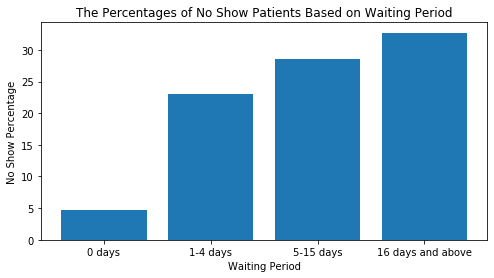

In [42]:
# percentages of no show patients based on waiting period
no_show_perc_waiting_period = df.groupby('waiting_period').no_show.mean() * 100

# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_perc_waiting_period.index, height = no_show_perc_waiting_period)
plt.title('The Percentages of No Show Patients Based on Waiting Period')
plt.xlabel('Waiting Period')
plt.ylabel('No Show Percentage');

It's pretty clear that the longer the waiting period is, the more likely the patient will not show up for the appointment.

So, we can say that the waiting period could help us to predict if a patient will show up for their scheduled appointment.

### Q7: What are the percentages of missed appointments for each special condition <br>(alcoholism, diabetes ... etc) ?

In [43]:
# total number of special conditions for each patient
df['number_of_cond'] = df.hipertension + df.diabetes + df.alcoholism + df.handcap

# empty dictionary 
cond_dict = {}

# percentage of no show patients who suffered from hypertension only
cond_dict['Hypertension'] = (df[df.number_of_cond <= 1].groupby('hipertension').no_show.mean() * 100)[1]
# percentage of no show patients who suffered from diabetes only
cond_dict['Diabetes'] = (df[df.number_of_cond <= 1].groupby('diabetes').no_show.mean() * 100)[1]
# percentage of no show patients who suffered from alcoholism only
cond_dict['Alcoholism'] = (df[df.number_of_cond <= 1].groupby('alcoholism').no_show.mean() * 100)[1]
# percentage of no show patients who were handicapped only
cond_dict['Handicapped'] = (df[df.number_of_cond <= 1].groupby('handcap').no_show.mean() * 100)[1]

# percentage of no show patients who suffered from multiple conditions
cond_dict['Multiple Conditions'] = df[df.number_of_cond > 1].no_show.mean() * 100

cond_dict

{'Hypertension': 17.016760594305786,
 'Diabetes': 20.3579418344519,
 'Alcoholism': 21.644120707596255,
 'Handicapped': 19.497907949790793,
 'Multiple Conditions': 17.69815418023887}

In [44]:
# convert the dictionary to a pandas series
cond_ser = pd.Series(cond_dict)
# sort the values in descending order
cond_ser.sort_values(ascending=False, inplace=True)
cond_ser

Alcoholism             21.644121
Diabetes               20.357942
Handicapped            19.497908
Multiple Conditions    17.698154
Hypertension           17.016761
dtype: float64

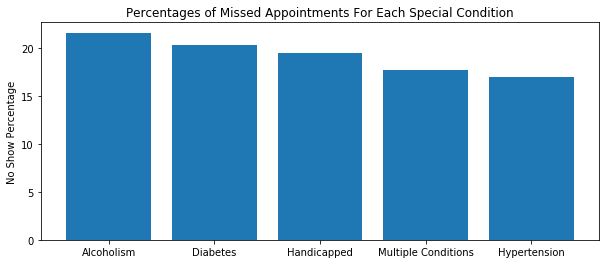

In [45]:
# plot a bar chart
plt.figure(figsize = [10, 4])
plt.bar(x = cond_ser.index, height = cond_ser)
plt.title('Percentages of Missed Appointments For Each Special Condition')
plt.ylabel('No Show Percentage');

As shown 21.64% of patients who suffered from alcoholism only didn't show up for their appointments,
20.36% of diabetic patients didn't show up too, and the patients who suffered from multiple conditions 17.70% of them missed their appointments. So, we can say that alcoholics are the most likely to miss their appointments among other patients with special conditions.

<hr>

## Conclusions <a id='conclusions'></a>
In this project I analyzed <a href='https://www.kaggle.com/joniarroba/noshowappointments' target="_blank">Medical Appointment No Shows Dataset </a> and communicated my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset contained **110,527** appointments in a period of **40** days, about **20%** of the patients didn't show up for their appointments.

Most patients: 
- Were females.
- Were young.
- Didn't have a scholarship.
- Didn't suffer from any special conditions (alcoholism, diabetes, hypertension, handicap).
- Scheduled their appointments on the same day.
- Prefered to have their appointments on working days (Monday-Friday) especially Tuesday and Wednesday.

### The following questions were answerd:
**Q1: Highest five neighbourhoods in terms of the number of no-show appointments?**

|Neighbourhood |Number of no-show appointments|
|:-:           |:-:                           |
|JARDIM CAMBURI|1,465                         |
|MARIA ORTIZ   |1,219                         |
|ITARARÉ       |923                           |
|RESISTÊNCIA   |905                           |
|CENTRO        |703                           |

**Q2: Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?**

The percentages of no show patients based on gender were pretty close.
So, we can say that the gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.

**Q3: Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?**

Yes, the younger the patient is the more likely he/she is going to miss the appointment. Except the group (0-18) since they probably are accompanied by an adult. 

**Q4: Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?**

Yes, it seems like a patient with a scholarship is more likely to not show up for the appointment.

**Q5: Can the day of the week that the appointment on be considered as a factor to predict if a patient will show up for their scheduled appointment?**

Somewhat, it looks like patients are more likely to miss their appointments on weekends and the days that are close to it (Monday, Friday).

**Q6: can the waiting period between scheduled day and appointment day be considered as a factor to predict if a patient will show up for their scheduled appointment?**

Yes, the longer the waiting period is, the more likely the patient will not show up for the appointment.

**Q7: What are the percentages of missed appointments for each special condition (alcoholism, diabetes ... etc) ?**

we can say that alcoholics are the most likely to miss their appointments among other patients with special conditions.

|Condition          |Percentage of no-show appointments|
|:-:                |:-:                               |
|Alcoholism only    |21.64%                            |
|Diabetes only      |20.36%                            |
|Handicapped only   |19.50%                            |
|Multiple Conditions|17.70%                            |
|Hypertension only  |17.02%                            |

### Limitation:
- The dataset covers a short period 40 days only, longer period could lead to a better results.
- Appointment time wasn't given, which could be very useful.
- Dataset description on kaggle wasn't up to date, so some columns values weren't clear until found in disscussion forms. 
- Recent data would be much better, since 2016 is about 4 years ago and a lot has changed since then.
- Covering more than one country would've been better.

<hr>

### References:
- Several questions on <a href='https://stackoverflow.com' target="_blank">Stack Overflow</a>.
- <a href='https://pandas.pydata.org/pandas-docs/stable/index.html' target="_blank">pandas documentation</a>.